EDA of performance prediction dataset

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [131]:
daily = pd.read_excel(open(r"Volve production data.xlsx",'rb'),sheet_name='Daily Production Data',parse_dates=True)
monthly = pd.read_excel(open(r"Volve production data.xlsx",'rb'),sheet_name='Monthly Production Data' )

In [132]:
old_names=monthly.columns
new_names=['Wellbore_name', 'NPDCode', 'Year', 'Month', 'On_Stream_Hrs', 'Oil_Sm3', 'Gas_Sm3',
       'Water_Sm3', 'GI_Sm3', 'WI_Sm3']
monthly.rename(columns=dict(zip(old_names, new_names)), inplace=True)
monthly.drop(index=0,inplace=True)

In [133]:
print(daily.head(5))
print(monthly.head(5))

     DATEPRD WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
0 2014-04-07  NO 15/9-F-1 C                7405         15/9-F-1 C   
1 2014-04-08  NO 15/9-F-1 C                7405         15/9-F-1 C   
2 2014-04-09  NO 15/9-F-1 C                7405         15/9-F-1 C   
3 2014-04-10  NO 15/9-F-1 C                7405         15/9-F-1 C   
4 2014-04-11  NO 15/9-F-1 C                7405         15/9-F-1 C   

   NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
0         3420717          VOLVE             369304    MÆRSK INSPIRER   
1         3420717          VOLVE             369304    MÆRSK INSPIRER   
2         3420717          VOLVE             369304    MÆRSK INSPIRER   
3         3420717          VOLVE             369304    MÆRSK INSPIRER   
4         3420717          VOLVE             369304    MÆRSK INSPIRER   

   ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  ...  AVG_CHOKE_UOM  AVG_WHP_P  \
0            0.0                0.00000  ...              %    0.0

In [134]:
print(monthly['NPDCode'].unique())
print(daily['NPD_WELL_BORE_CODE'].unique())
print("--------------------------------------------------------------------------------------------------------------")

print(daily['NPD_WELL_BORE_NAME'].unique())
print(daily['WELL_BORE_CODE'].unique())

[7405. 7078. 5599. 5351. 7289. 5693. 5769.]
[7405 7078 5599 5351 7289 5693 5769]
--------------------------------------------------------------------------------------------------------------
['15/9-F-1 C' '15/9-F-11' '15/9-F-12' '15/9-F-14' '15/9-F-15 D' '15/9-F-4'
 '15/9-F-5']
['NO 15/9-F-1 C' 'NO 15/9-F-11 H' 'NO 15/9-F-12 H' 'NO 15/9-F-14 H'
 'NO 15/9-F-15 D' 'NO 15/9-F-4 AH' 'NO 15/9-F-5 AH']


In [135]:
list_columns = ['AVG_DOWNHOLE_PRESSURE','AVG_DOWNHOLE_TEMPERATURE','AVG_DP_TUBING','AVG_ANNULUS_PRESS','AVG_WHP_P','AVG_WHT_P','BORE_OIL_VOL']
daily[list_columns]=daily[list_columns].fillna(value=0)

In [136]:
#daily.isna().sum()

In [137]:
daily.drop(columns=['NPD_WELL_BORE_NAME','NPD_FIELD_NAME','NPD_FACILITY_NAME','NPD_FACILITY_CODE'])


,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_FIELD_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,3420717,0.0,0.00000,0.00000,0.00000,0.00000,0.000000,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,3420717,0.0,0.00000,0.00000,0.00000,0.00000,1.003059,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,3420717,0.0,0.00000,0.00000,0.00000,0.00000,0.979008,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,3420717,0.0,0.00000,0.00000,0.00000,0.00000,0.545759,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,3420717,0.0,310.37614,96.87589,277.27826,0.00000,1.215987,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15629,2016-09-14,NO 15/9-F-5 AH,5769,3420717,0.0,0.00000,0.00000,0.00000,0.27272,0.636088,%,0.07776,0.22879,0.01862,0.0,0.0,0.0,NaN,production,OP
15630,2016-09-15,NO 15/9-F-5 AH,5769,3420717,0.0,0.00000,0.00000,0.00000,0.28686,0.670794,%,0.08545,0.22914,0.00631,0.0,0.0,0.0,NaN,production,OP
15631,2016-09-16,NO 15/9-F-5 AH,5769,3420717,0.0,0.00000,0.00000,0.00000,0.28604,0.664393,%,0.08544,0.22896,0.01181,0.0,0.0,0.0,NaN,production,OP
15632,2016-09-17,NO 15/9-F-5 AH,5769,3420717,0.0,0.00000,0.00000,0.00000,0.27212,0.624660,%,0.07497,0.22846,0.02576,0.0,0.0,0.0,NaN,production,OP


In [138]:
daily['FLOW_KIND'].unique()

array(['production', 'injection'], dtype=object)

In [139]:
daily['WELL_TYPE'].unique()

array(['WI', 'OP'], dtype=object)

In [140]:
daily['WELL_BORE_CODE'].unique()

array(['NO 15/9-F-1 C', 'NO 15/9-F-11 H', 'NO 15/9-F-12 H',
       'NO 15/9-F-14 H', 'NO 15/9-F-15 D', 'NO 15/9-F-4 AH',
       'NO 15/9-F-5 AH'], dtype=object)

In [141]:
well_F1=daily[(daily['WELL_BORE_CODE']=='NO 15/9-F-1 C')& (daily['BORE_OIL_VOL']>0) & (daily['FLOW_KIND']=='production')]
#well_F1.isna().sum()

In [142]:
#print(daily.groupby('WELL_BORE_CODE')['BORE_OIL_VOL'])

(array([735324., 735415., 735507., 735599., 735689., 735780., 735872.,
        735964., 736055.]), <a list of 9 Text xticklabel objects>)

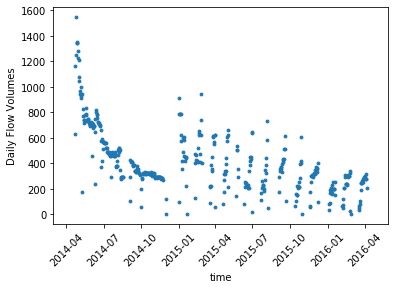

In [143]:
plt.scatter('DATEPRD','BORE_OIL_VOL', data=well_F1 , alpha=1 , s=8)
plt.xlabel('time')
plt.ylabel('Daily Flow Volumes')
plt.xticks(rotation=45)


In [144]:
monthly.drop(columns='GI_Sm3', inplace=True)

In [145]:
monthly['WI_Sm3'].fillna(value=0 , inplace=True)

In [146]:
monthly.head()

,Wellbore_name,NPDCode,Year,Month,On_Stream_Hrs,Oil_Sm3,Gas_Sm3,Water_Sm3,WI_Sm3
1,15/9-F-1 C,7405.0,2014.0,4.0,227.5,11142.5,1.59794e+06,0,0.0
2,15/9-F-1 C,7405.0,2014.0,5.0,733.833,24902,3.49623e+06,783.48,0.0
3,15/9-F-1 C,7405.0,2014.0,6.0,705.917,19617.8,2.88666e+06,2068.48,0.0
4,15/9-F-1 C,7405.0,2014.0,7.0,742.417,15085.7,2.24937e+06,6243.98,0.0
5,15/9-F-1 C,7405.0,2014.0,8.0,432.992,6970.43,1.04819e+06,4529.75,0.0


In [147]:
monthly['Month']=monthly['Month'].astype(int)
monthly['Year']=monthly['Year'].astype(int)       

Joining month and year

In [148]:
def numConcat(num1, num2):  
        num1 = str(num1) 
        num2 = str(num2) 
          
        
        num1 += num2 
          
        return int(num1) 

In [149]:
date_format= zip(monthly['Month'],monthly['Year'])
date_string=[]

for x,y in date_format :
    date= numConcat(x,y)
    date_string.append(date)

In [150]:
import datetime

date_final=[]

for item in date_string :
    date_str = str(item)
    format_str = '%m%Y' 
    datetime_obj = datetime.datetime.strptime(date_str, format_str)
    date_final.append(datetime_obj)

In [151]:
monthly['Month_Year']=date_final

In [152]:
monthly.drop(columns=['Month','Year'])

,Wellbore_name,NPDCode,On_Stream_Hrs,Oil_Sm3,Gas_Sm3,Water_Sm3,WI_Sm3,Month_Year
1,15/9-F-1 C,7405.0,227.5,11142.5,1.59794e+06,0,0.0,2014-04-01
2,15/9-F-1 C,7405.0,733.833,24902,3.49623e+06,783.48,0.0,2014-05-01
3,15/9-F-1 C,7405.0,705.917,19617.8,2.88666e+06,2068.48,0.0,2014-06-01
4,15/9-F-1 C,7405.0,742.417,15085.7,2.24937e+06,6243.98,0.0,2014-07-01
5,15/9-F-1 C,7405.0,432.992,6970.43,1.04819e+06,4529.75,0.0,2014-08-01
...,...,...,...,...,...,...,...,...
522,15/9-F-5,5769.0,732,9724.4,1.53468e+06,3949.9,0.0,2016-05-01
523,15/9-F-5,5769.0,718.417,9121.48,1.46856e+06,2376.93,0.0,2016-06-01
524,15/9-F-5,5769.0,668.642,9985.29,1.60267e+06,2453.71,0.0,2016-07-01
525,15/9-F-5,5769.0,608.425,8928.9,1.41728e+06,2371.86,0.0,2016-08-01


AttributeError: Cannot access attribute 'values' of 'SeriesGroupBy' objects, try using the 'apply' method